# Results Analysis

Suppose you have the results in a `data` directory

## Some Imports

In [1]:
import os

import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
%matplotlib inline

In [9]:
sns.set_context('talk')

In [4]:
DATADIR = './data'
DATASET = 'bordeaux-metropole'

## Plotting functions

See also in the `unsupervised_learning.py` module, there are the following functions:

* `plot_feature_contribution`
* `plot_pca_variance`

In [26]:
def plot_feature_contribution(data):
    """Plot feature contribution by using seaborn heatmap capability

    Parameters
    ----------
    data: pd.DataFrame
        data to plot: contributions to PCA components
    
    """
    f, ax = plt.subplots(figsize=(10,12))
    sns.heatmap(data, annot=True, fmt='.3f', ax=ax)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

In [40]:
def plot_pca_variance(varmat):
    """Plot the PCA variance analysis: cumulated sum of explained variance as
    well as eigenvalues

    Parameters
    ----------
    varmat: pd.DataFrame
        PCA variance analysis results; contains three columns ('eig', 'varexp'
    and 'cumvar')
    
    """
    f, ax = plt.subplots(2,1)
    ax[0].bar(range(1,1+len(varmat)), varmat['varexp'].values, alpha=0.25, 
            align='center', label='individual explained variance', color = 'g')
    ax[0].step(range(1,1+len(varmat)), varmat['cumvar'].values, where='mid',
             label='cumulative explained variance')
    ax[0].axhline(70, color="blue", linestyle="dotted")
    ax[0].legend(loc='best')
    ax[1].bar(range(1,1+len(varmat)), varmat['eig'].values, alpha=0.25,
              align='center', label='eigenvalues', color='r')
    ax[1].axhline(1, color="red", linestyle="dotted")
    ax[1].legend(loc="best")
    plt.show()

In [42]:
def scatter_by_label(pca, labels, x='PC1', y='PC2', palette='Paired'):
    """PCA scatter plot with clustering labels
    """
    nb_clusters = labels.nunique()
    colors = sns.color_palette('Paired', n_colors=nb_clusters)
    fig, ax = plt.subplots()
    for k, color in enumerate(colors):
        mask = labels == k
        pca.loc[mask, :].plot(kind='scatter', x=x, y=y, color=color, ax=ax)
    ax.legend(range(nb_clusters))
    plt.show()

## Load the PCA results

In [23]:
variance_file = os.path.join(DATADIR, 'output-extracts', DATASET,
                             'user-metadata-variance-analysis-min-3-max-12.csv')

In [16]:
pca_file = os.path.join(DATADIR, 'output-extracts', DATASET,
                        'user-metadata-n_components-6-pca.h5')

In [24]:
variance = pd.read_csv(variance_file)

In [17]:
features = pd.read_hdf(pca_file, '/features')

In [18]:
individuals = pd.read_hdf(pca_file, '/individuals')

In [25]:
variance.head()

,eig,varexp,cumvar
0,1.084392,28.527196,28.527196
1,0.551519,14.508857,43.036053
2,0.346005,9.102373,52.138426
3,0.331242,8.714022,60.852448
4,0.261060,6.867738,67.720186


In [19]:
features.head()

,PC1,PC2,PC3,PC4,PC5,PC6
lifespan,0.005021,0.151496,0.017011,-0.014418,-0.013205,0.031819
n_inscription_days,0.051171,0.105394,0.198760,-0.169271,-0.072655,-0.015341
n_activity_days,0.002890,0.369235,0.005201,0.005030,-0.081164,0.110626
u_chgset,-0.060586,0.366453,-0.067508,0.050110,-0.142309,0.139086
dmean_chgset,0.000752,0.001420,0.001912,-0.000539,-0.002688,0.002155


In [20]:
individuals.head()

,PC1,PC2,PC3,PC4,PC5,PC6
uid,,,,,,
1626,-0.035154,1.607426,0.399873,-0.808836,-0.152335,-0.754197
1399,-0.295486,-0.743362,0.149833,-1.252060,0.128093,-0.291948
2488,0.003268,1.073443,0.738330,-0.534689,-0.489524,-0.332464
5657,-0.889706,0.986029,0.442384,-1.046567,-0.119019,-0.407261
3980,-0.115455,-0.373606,0.906825,0.252714,0.207909,-0.577190


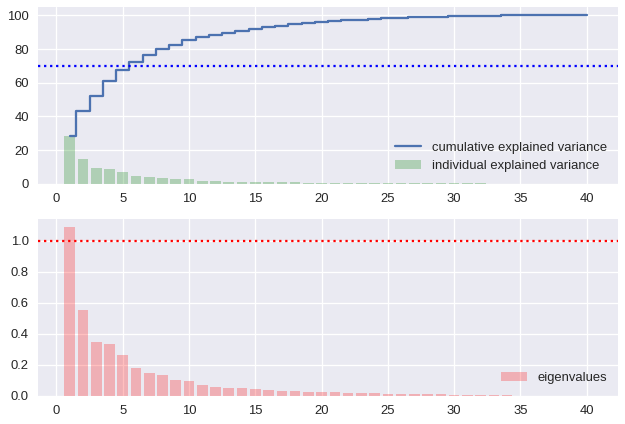

In [46]:
# Variance analysis
plot_pca_variance(variance)

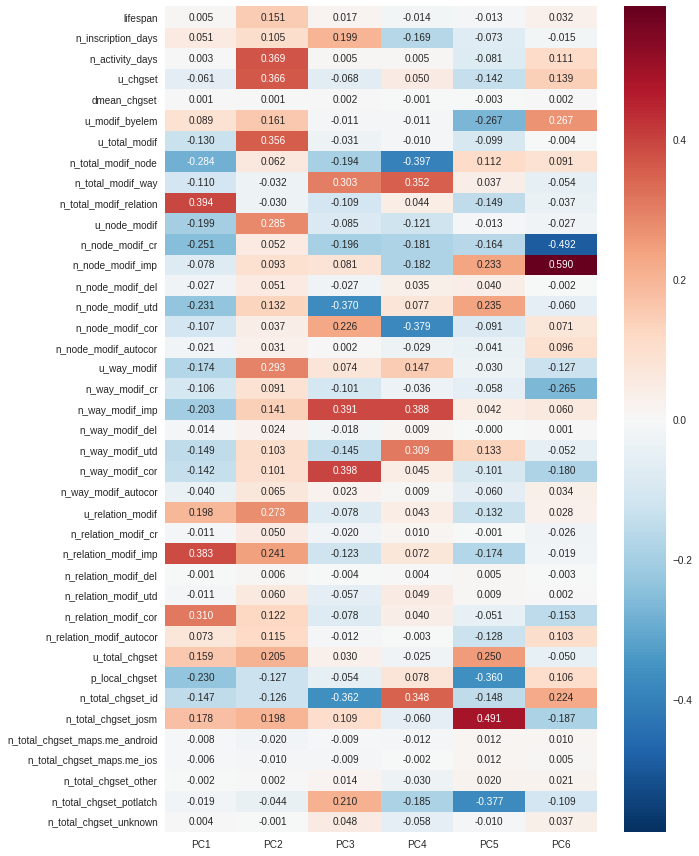

In [39]:
# features PCA contributions
plot_feature_contribution(features)

## Load the KMeans results

In [5]:
km_file = os.path.join(DATADIR, 'output-extracts', DATASET,
                      'user-metadata-pca-6-clusters-5-kmeans.h5')

In [6]:
centers = pd.read_hdf(km_file, '/centroids')

In [7]:
df = pd.read_hdf(km_file, '/individuals')

In [14]:
centers.head()

,PC1,PC2,PC3,PC4,PC5,PC6,n_individuals
0,1.506382,-0.136431,-0.145083,0.032667,-0.120828,-0.030043,587
1,-1.031660,-0.076376,-0.587138,0.263942,-0.010401,-0.001320,437
2,-0.365180,-0.588374,0.859958,0.834188,0.145226,-0.008664,241
3,-0.154715,1.286337,0.105560,-0.016425,0.095490,-0.030572,338
4,-0.623637,-0.381963,0.210243,-0.702140,0.017438,0.065178,470


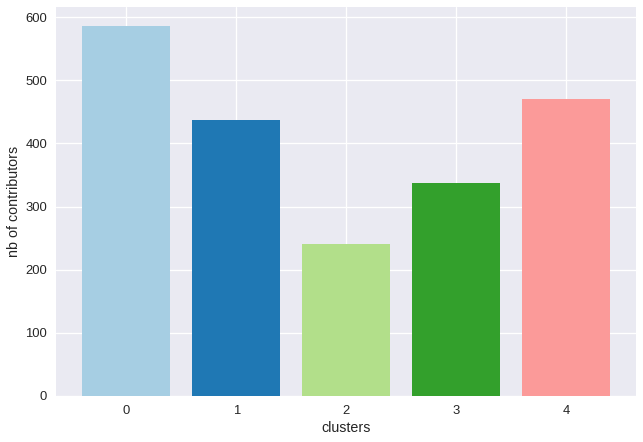

In [10]:
# number of contributors for each cluster
fig, ax = plt.subplots()
plt.bar(centers.index, centers.n_individuals, color=sns.color_palette('Paired'), axes=ax)
ax.set_ylabel("nb of contributors")
ax.set_xlabel("clusters")
plt.show()

In [15]:
df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,Xclust
uid,,,,,,,
1626,-0.035154,1.607426,0.399873,-0.808836,-0.152335,-0.754197,3
1399,-0.295486,-0.743362,0.149833,-1.252060,0.128093,-0.291948,4
2488,0.003268,1.073443,0.738330,-0.534689,-0.489524,-0.332464,3
5657,-0.889706,0.986029,0.442384,-1.046567,-0.119019,-0.407261,3
3980,-0.115455,-0.373606,0.906825,0.252714,0.207909,-0.577190,2


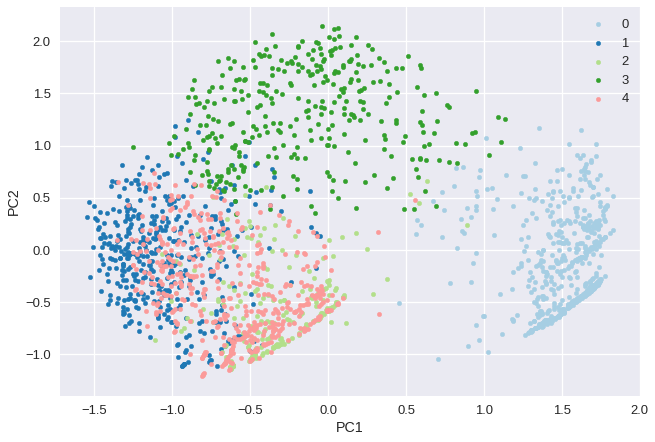

In [47]:
scatter_by_label(df.drop('Xclust', axis=1), df['Xclust'])

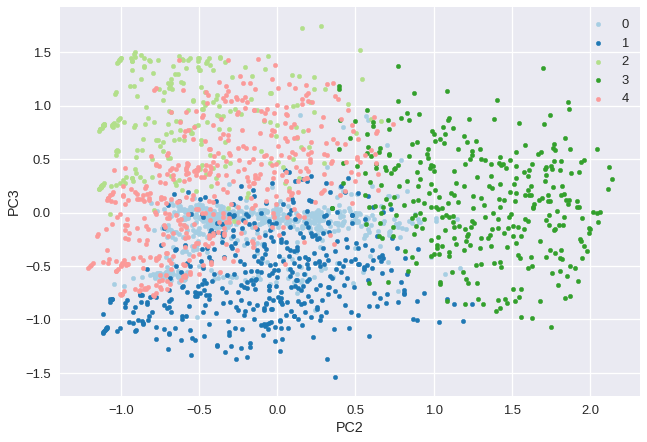

In [51]:
scatter_by_label(df.drop('Xclust', axis=1), df['Xclust'], 'PC2', 'PC3')